In [1]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_all_graphs(time_series, solution_of_ode, legends, gap):
    for i in range(len(solution_of_ode)):
        plt.plot(time_series, solution_of_ode[i])
        plt.plot(time_series, np.full((len(solution_of_ode[i])), gap, dtype='int32'))
        plt.title(legends[i])
        plt.xlabel("Time")
        plt.grid()
        plt.show()

# def hit_spring(t, y):
#     return y[0] + 1

# hit_spring.terminal = True

[2.]
[2.00106452]
[2.01244176]
[2.02191339]
[2.07211772]
[2.08225875]
[2.0965874]
[2.09742941]
[2.25159572]
[2.43067059]
[3.16124738]
[3.15674843]
[3.44150941]
[3.6366016]
[4.05094449]
[4.24022187]
[4.50451183]
[3.78987931]
[3.88032306]
[4.92402338]
[3.99547552]
[4.16148877]
[4.54699273]
[4.12862635]
[4.22578681]
[4.88997811]
[4.96805462]
[4.91049733]
[4.42139428]
[4.09419196]
[3.89615309]
[4.2011648]
[3.89971108]
[3.69223182]
[2.82230561]
[2.84912159]
[2.59265738]
[2.32095087]
[1.77230831]
[1.5319379]
[1.11394217]
[1.96840842]
[1.86345406]
[0.56532132]
[1.85961158]
[1.65294755]
[1.08840939]
[1.52442886]
[1.40363267]
[0.66179454]
[0.51672596]
[0.54386227]
[0.80880072]
[1.04141055]
[1.20065268]
[0.95604515]
[1.16986686]
[1.31768445]
[1.70289302]
[1.39699421]
[1.53943781]
[2.06068804]
[2.20405497]
[2.20350004]
[1.76689178]
[1.18881601]
[1.03094003]
[1.70598627]
[1.40365359]
[1.14879526]
[-0.13969718]
[-0.41046713]
[-0.8064734]
[-0.77317471]
[-1.49072088]
[-1.88823756]
[51.29271714]
[138.

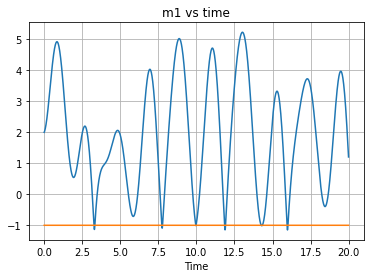

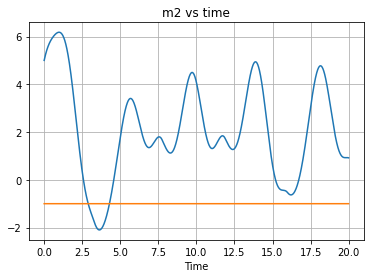

In [20]:
def F(t, y):
##########################################################################################################################################################################################
    m1 = 3
    m2 = 5

    k1 = 7
    k2 = 9
    k3 = 900

    c1 = 1
    c2 = 2

    f1 = 40*np.cos(3*t)
    f2 = 0
##########################################################################################################################################################################################

    M = np.array([
        [m1, 0],
        [0, m2]
    ])

    C = np.array([
        [c1 + c2, -c2],
        [-c2, c2]
    ])

    K = np.array([
        [k1+ k2, -k2],
        [-k2, k2]
    ])

    KK = np.array([
        [k1 + k3 + k2, -k2],
        [-k2, k2]
    ])

    A = np.vstack([
        np.hstack([
            np.zeros((2, 2)), 
            np.eye(2, 2)
        ]), 
        np.hstack([
            -np.matmul(np.linalg.inv(M), K), 
            -np.matmul(np.linalg.inv(M), C)
        ])
    ])

    AA = np.vstack([
        np.hstack([
            np.zeros((2, 2)), 
            np.eye(2, 2)
        ]), 
        np.hstack([
            -np.matmul(np.linalg.inv(M), KK), 
            -np.matmul(np.linalg.inv(M), C)
        ])
    ])


    B = np.vstack([
        np.zeros((2, 2)), 
        np.linalg.inv(M)
    ])

    F = np.array([
        [f1],
        [f2]
    ])

    yvec = np.array([[y[i] for i in range(4)]]).T

    ydot1 = np.matmul(A, yvec) + np.matmul(B, F)    # k1 = 7 
    ydot2 = np.matmul(AA, yvec) + np.matmul(B, F)   # k1 = 14

    print(y[0])

    if (y[0] > -1):
        return ydot1
    else:
        return ydot2

####################################################################################################################################################################################
start_time = 0
end_time = 20
delta_t = 0.01

gap = -1

initial_position_m_1 = 2
initial_velocity_m_1 = 1

initial_position_m_2 = 5
initial_velocity_m_2 = 3
####################################################################################################################################################################################

TE = np.arange(start_time, end_time, delta_t)

time_interval = np.array([start_time, end_time])

initial_conditions = np.array([
    initial_position_m_1, 
    initial_position_m_2, 
    initial_velocity_m_1, 
    initial_velocity_m_2
])

sol = solve_ivp(F, time_interval, initial_conditions, t_eval = TE, vectorized=True, method = 'RK45')


T = sol.t
Y = sol.y
# TT = sol.t_events
# YY = sol.y_events

legends = ['m1 vs time', 'm2 vs time']

plot_all_graphs(T, Y[:2], legends, gap)



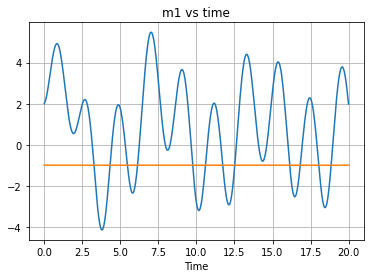

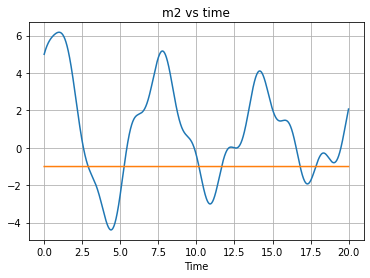

In [19]:
def F(t, y):
##########################################################################################################################################################################################
    m1 = 3
    m2 = 5

    k1 = 7
    k2 = 9
    k3 = 9

    c1 = 1
    c2 = 2

    f1 = 40*np.cos(3*t)
    f2 = 0
##########################################################################################################################################################################################

    M = np.array([
        [m1, 0],
        [0, m2]
    ])

    C = np.array([
        [c1 + c2, -c2],
        [-c2, c2]
    ])

    K = np.array([
        [k1+ k2, -k2],
        [-k2, k2]
    ])

    KK = np.array([
        [k1 + k3 + k2, -k2],
        [-k2, k2]
    ])

    A = np.vstack([
        np.hstack([
            np.zeros((2, 2)), 
            np.eye(2, 2)
        ]), 
        np.hstack([
            -np.matmul(np.linalg.inv(M), K), 
            -np.matmul(np.linalg.inv(M), C)
        ])
    ])

    AA = np.vstack([
        np.hstack([
            np.zeros((2, 2)), 
            np.eye(2, 2)
        ]), 
        np.hstack([
            -np.matmul(np.linalg.inv(M), KK), 
            -np.matmul(np.linalg.inv(M), C)
        ])
    ])


    B = np.vstack([
        np.zeros((2, 2)), 
        np.linalg.inv(M)
    ])

    F = np.array([
        [f1],
        [f2]
    ])

    yvec = np.array([[y[i] for i in range(4)]]).T

    ydot1 = np.matmul(A, yvec) + np.matmul(B, F)    # k1 = 7 
    ydot2 = np.matmul(AA, yvec) + np.matmul(B, F)   # k1 = 14


    if (y[0] > -1):
        return ydot1
    else:
        return ydot2

####################################################################################################################################################################################
start_time = 0
end_time = 20
delta_t = 0.01

gap = -1

initial_position_m_1 = 2
initial_velocity_m_1 = 1

initial_position_m_2 = 5
initial_velocity_m_2 = 3
####################################################################################################################################################################################

TE = np.arange(start_time, end_time, delta_t)

time_interval = np.array([start_time, end_time])

initial_conditions = np.array([
    initial_position_m_1, 
    initial_position_m_2, 
    initial_velocity_m_1, 
    initial_velocity_m_2
])

sol = solve_ivp(F, time_interval, initial_conditions, t_eval = TE, vectorized=True, method = 'RK45')


T = sol.t
Y = sol.y
# TT = sol.t_events
# YY = sol.y_events

legends = ['m1 vs time', 'm2 vs time']

plot_all_graphs(T, Y[:2], legends, gap)

